# Feed Forward (FF)

Au lieu de faire du feature engineering, on va améliorer notre modèle en ajoutant d'autres neurones à l'intérieur. L'idée est de laisser la machine apprendre à faire son propre **feature engineering**, en lui allouant des neurones dédiés à cela.

## Import

In [1]:
from IPython.display import Image

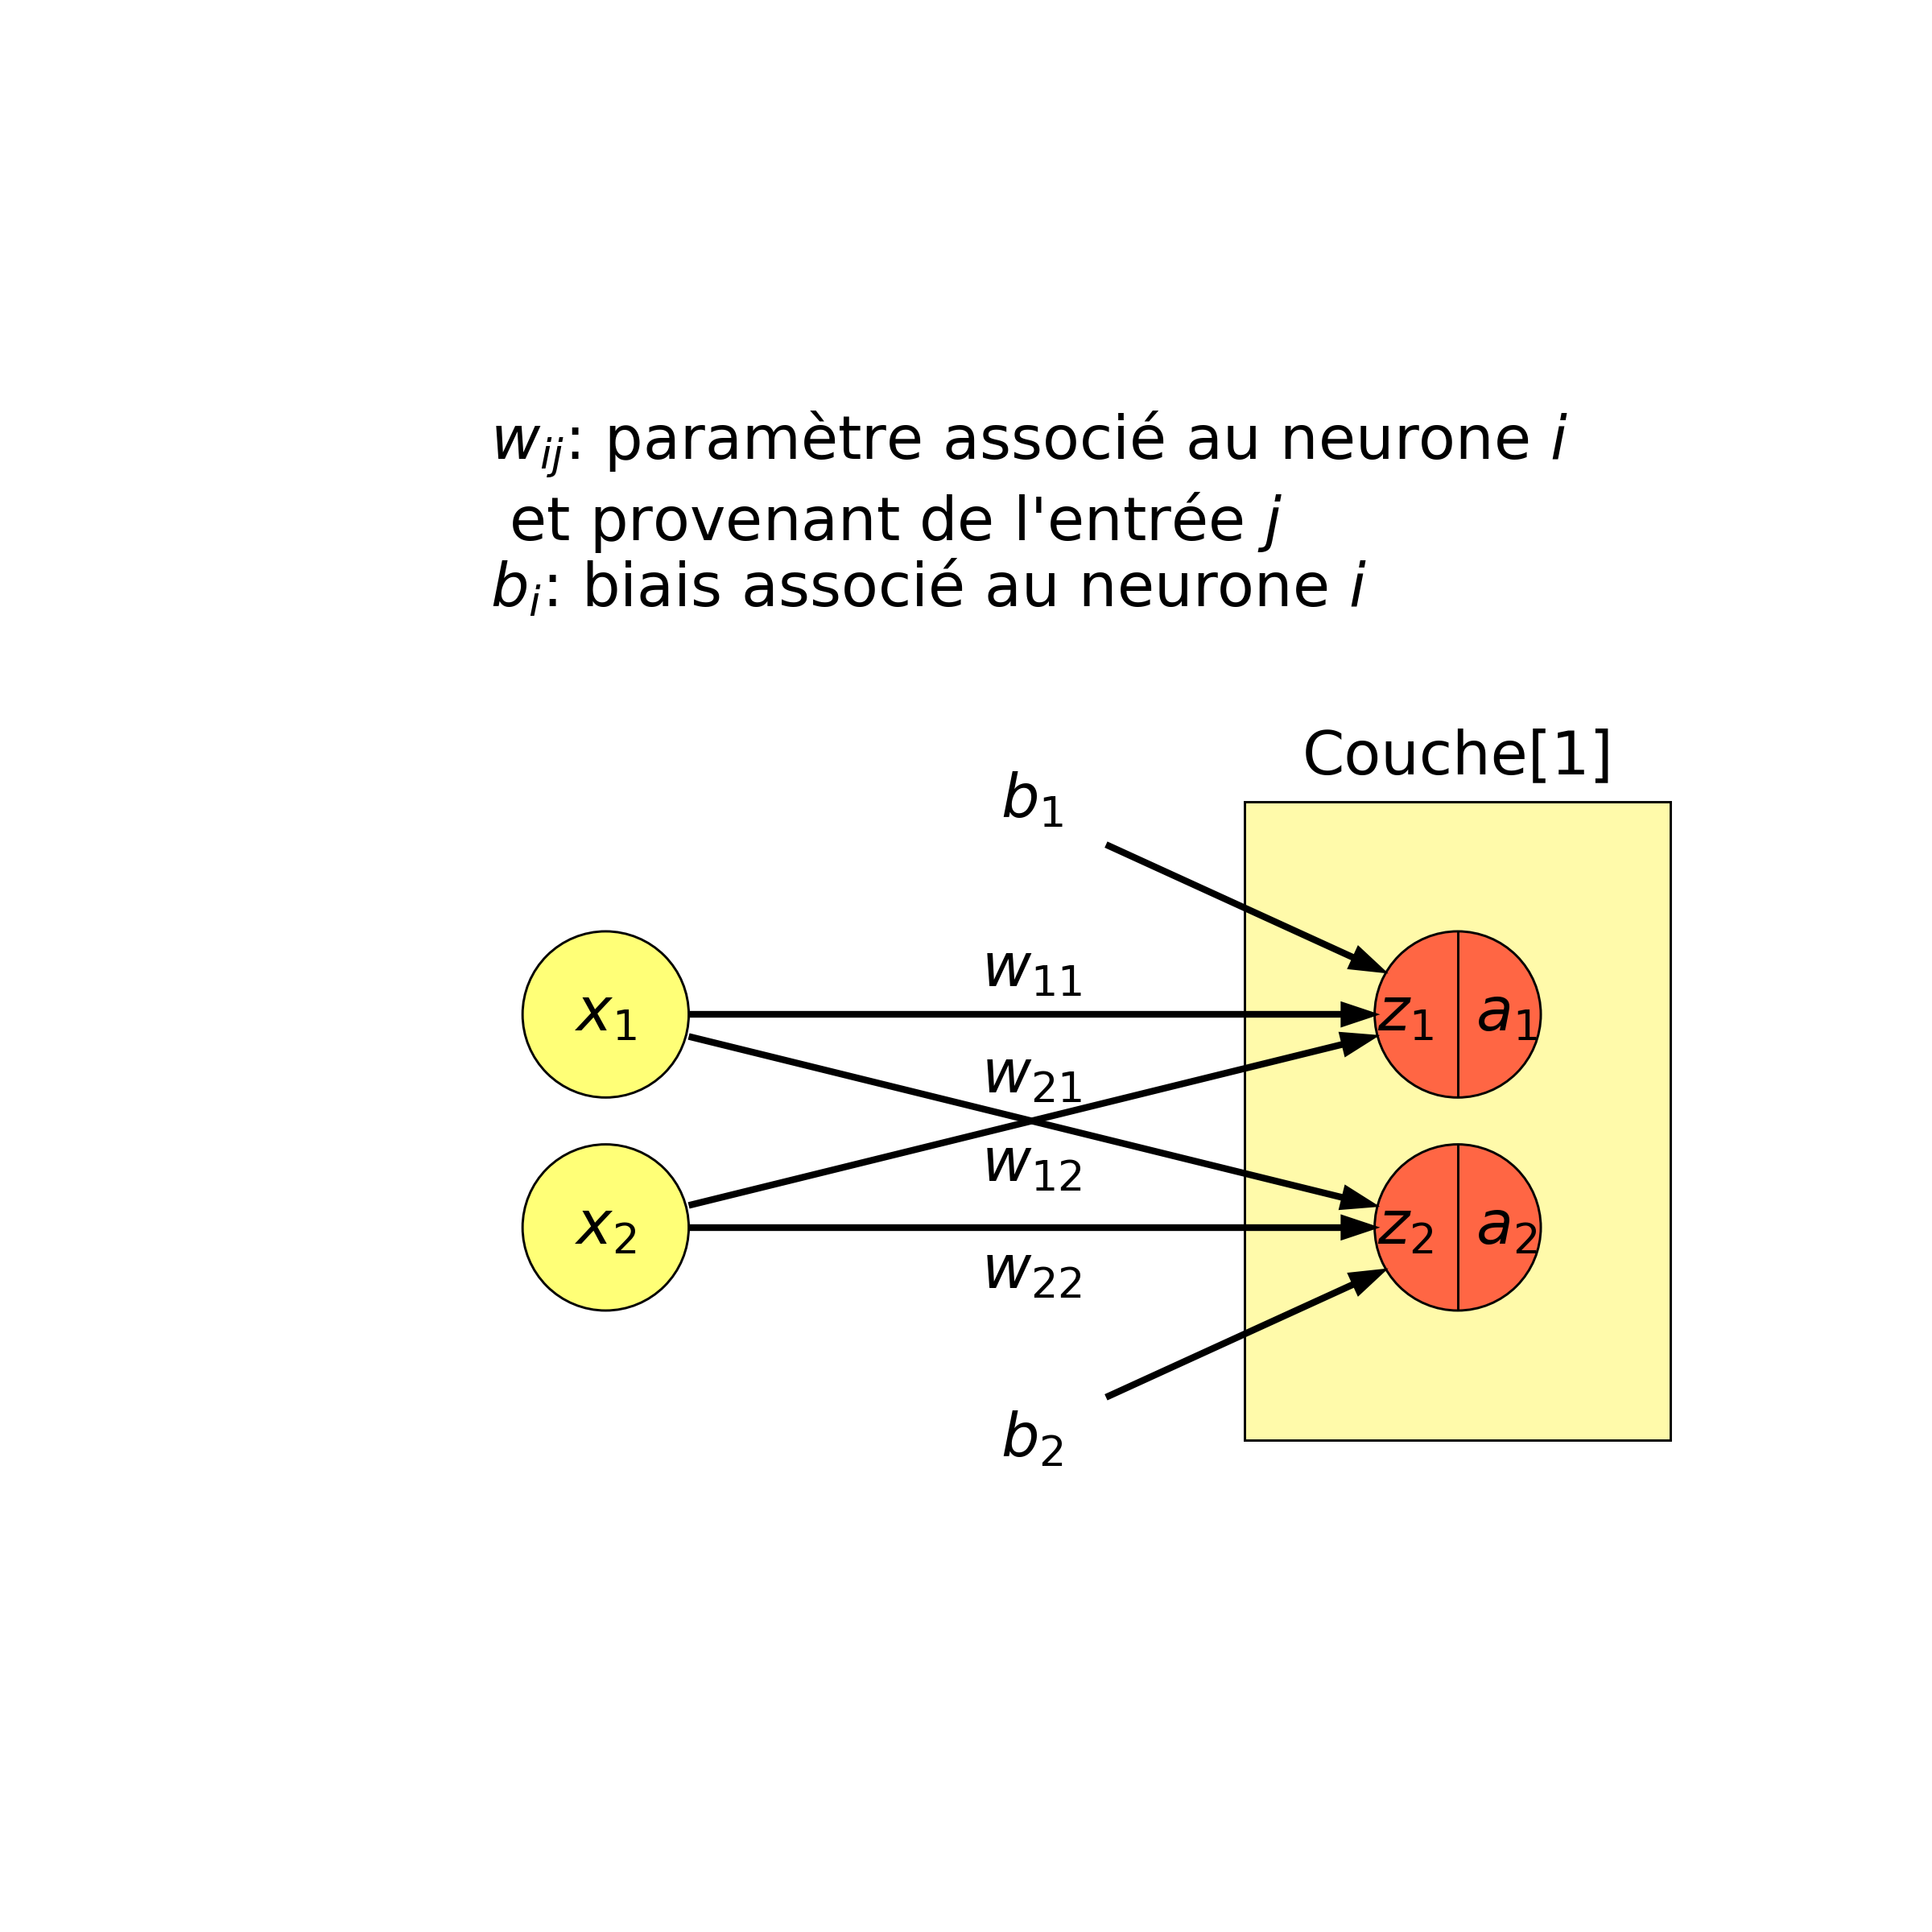

In [2]:
Image(filename='../../Viznet/FeedForward.png', width = 500)

$z_1 = w_{11}x_1 + w_{12}x_2+b_1$  
$a_1 = \frac{1}{1+\exp^{-z_1}}$  
  
$z_2 = w_{21}x_1 + w_{22}x_2+b_2$  
$a_2 = \frac{1}{1+\exp^{-z_2}}$  

On peux rajouter autant de neurones que l'on souhaite dans la couche 1. Cela permet d'augmenter la puissance du réseau cependant cela ralentis l'entrainement.

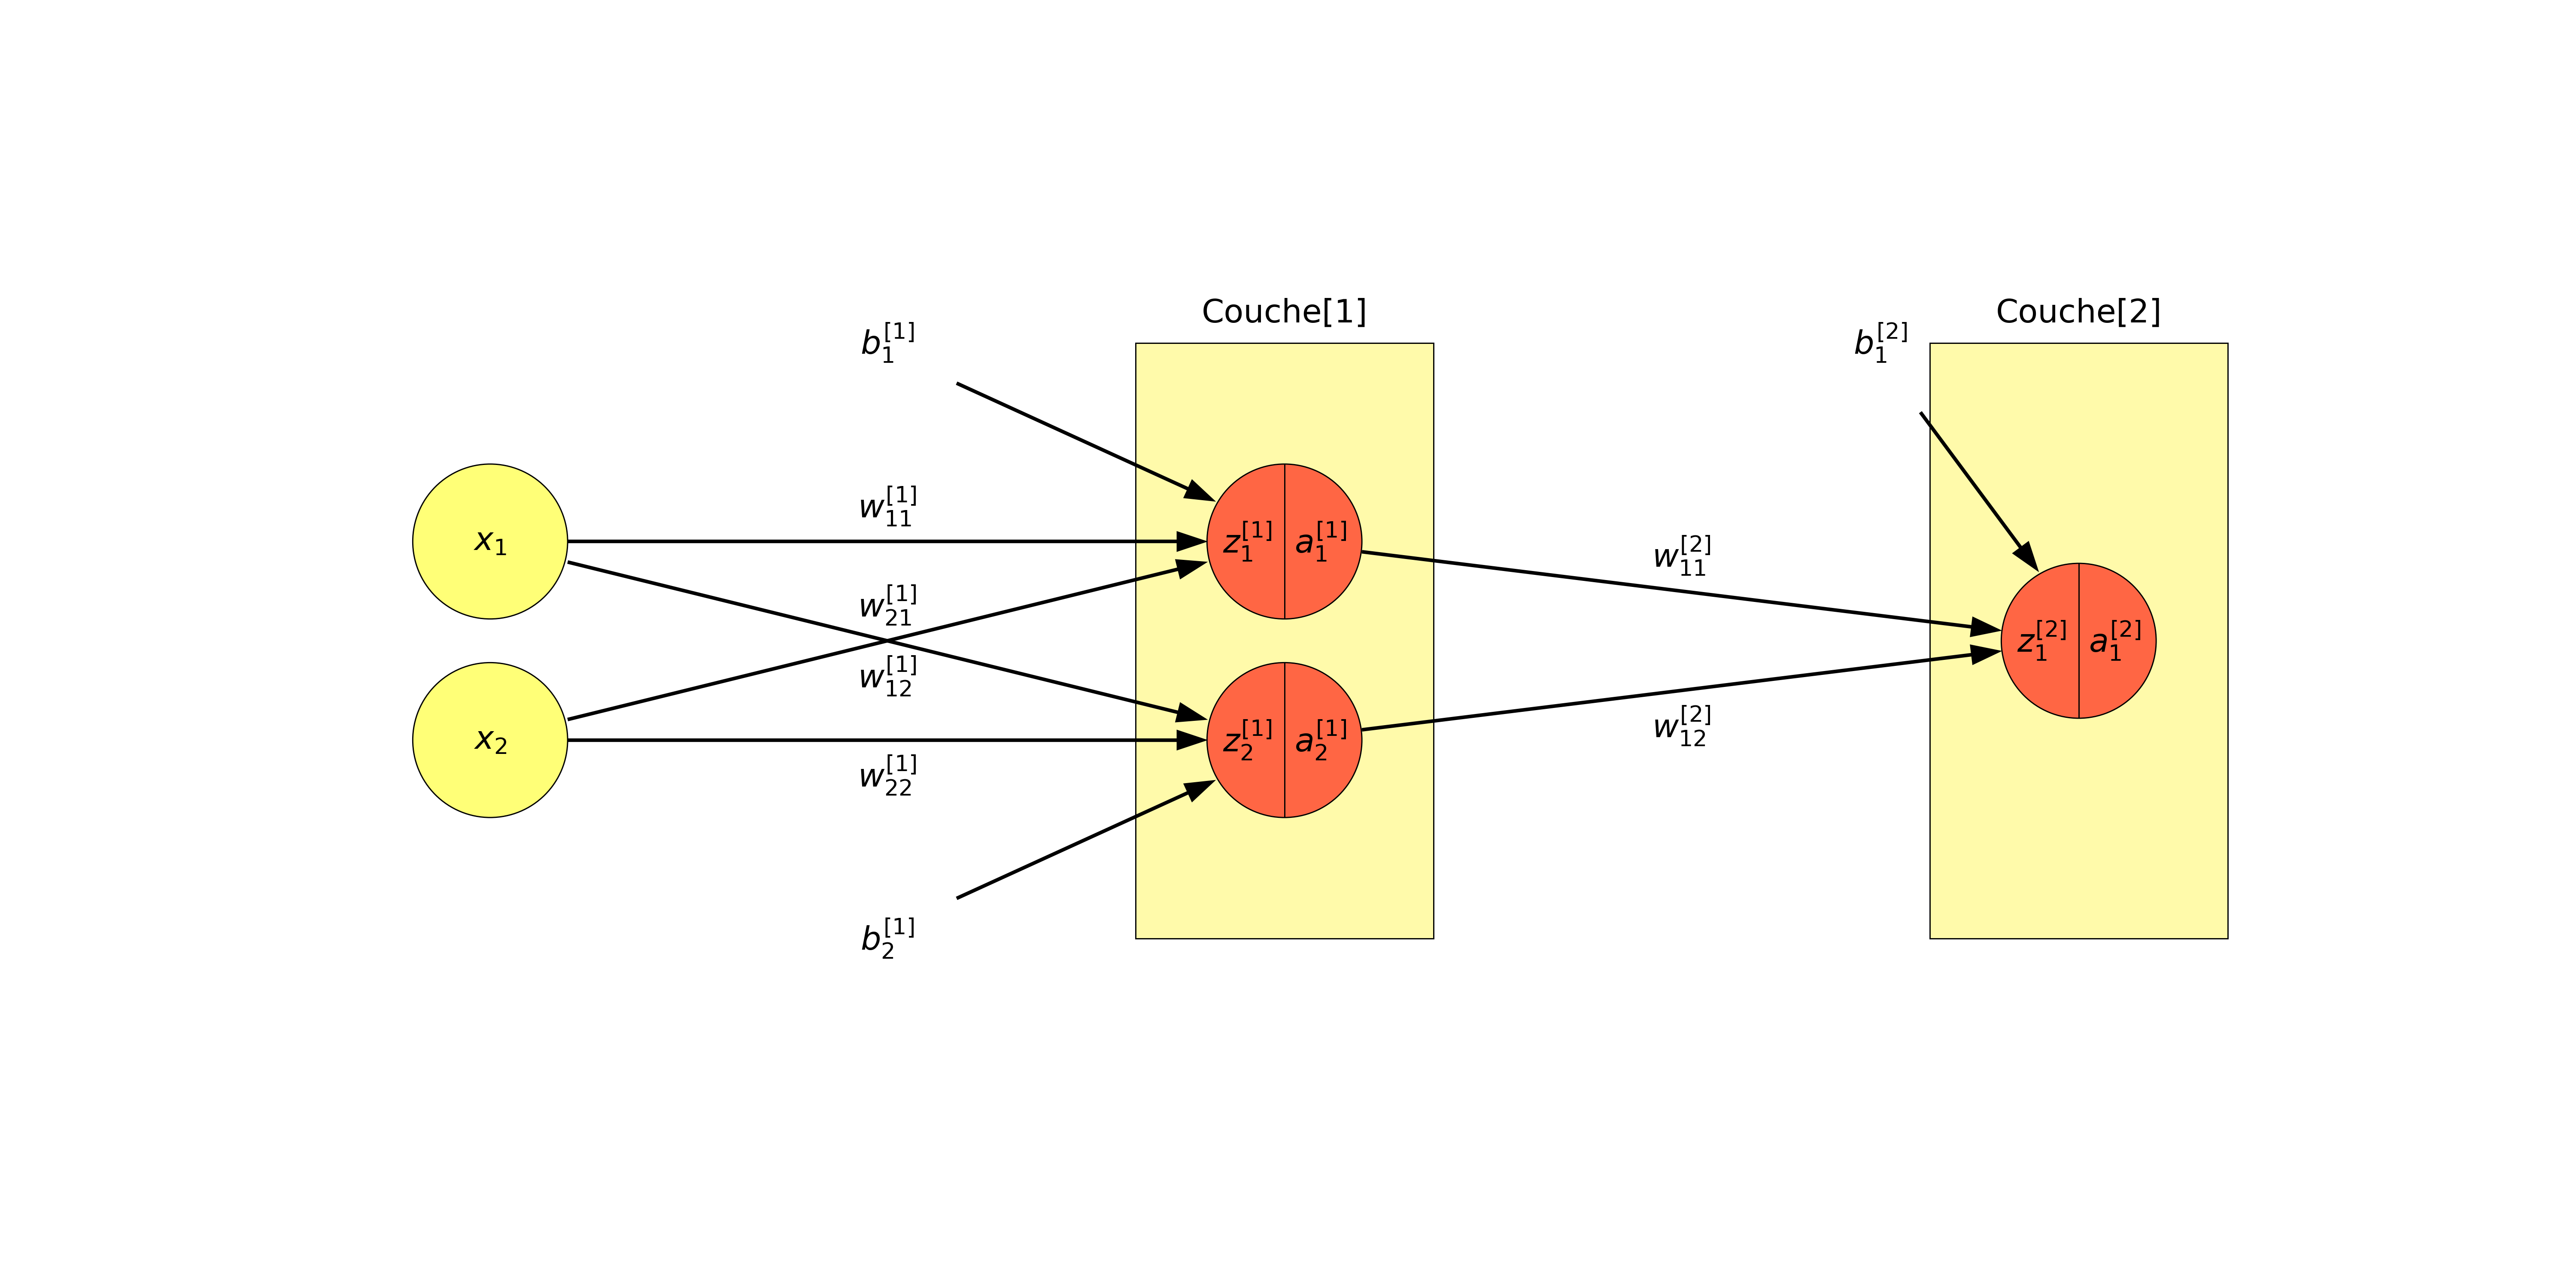

In [3]:
Image(filename='../../Viznet/FeedForward2C.png', width = 1000)

$z^{[2]}_1 = w^{[2]}_{11}a^{[1]}_1 + w^{[2]}_{12}a^{[1]}_2+b^{[2]}_1$  
$a^{[2]}_1 = \frac{1}{1+\exp^{-z^{[2]}_1}}$   

On Peut ajouté autant de couches que l'on souhaites avec autant de neurones que l'on souhaites à l'intérieur. On appelera donc notre réseau un **Deep Neural Network**.
Plus le réseau est profond, plus il est capable d'apprendre des choses compliquées. Mais cela rend aussi l'apprentissage plus long.

**En résumé:**  
1. On note $w_{ij}$ le paramètre associé au neurone $i$ et provenant de l'entrée $j$
2. On note $^{[C]}$ le numéro de la couche $C$ sur laquelle on travaille : $z^{[1]}$, $z^{[2]}$, etc.
3. Pour calculer les valeur $z$ d'une couche $^{[C]}$ on utilise les activations $a$ de la couche $^{[C - 1]}$  
$z^{[2]}_1 = w^{[2]}_{11}a^{[1]}_1 + w^{[2]}_{12}a^{[1]}_2+b^{[2]}_1$  

## Vectorization

$$
\begin{equation*}
\large{
    Z^{[1]} =
    \underbrace{
        \begin{bmatrix}
        x_{1}^{(1)} & x_{2}^{(1)}\\
        x_{1}^{(2)} & x_{2}^{(2)}\\
        \vdots & \vdots\\
        x_{1}^{(m)} & x_{2}^{(m)}
        \end{bmatrix}
    }_{X \in \mathbb{R}^{m \times 2}}\
    \cdot
    \color{orange}{
        \underbrace{
            \begin{bmatrix}
            w_{11}^{[1]} & w_{21}^{[1]}\\
            w_{12}^{[1]} & w_{22}^{[1]}
            \end{bmatrix}
        }_{W^{[1]} \in \mathbb{R}^{2 \times 2}}\
    }
    +
    \color{green}{
        \underbrace{
            \begin{bmatrix}
            b_{1}^{[1]} & \color{teal}{b_{2}^{[1]}}
            \end{bmatrix}
        }_{b^{[1]} \in \mathbb{R}^{1 \times 2}}\
    }
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{2}^{[1](1)}\\
        Z_{1}^{[1](2)} & Z_{2}^{[1](2)}\\
        \vdots & \vdots\\
        x_{1}^{(m)} & x_{2}^{(m)}\\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{m \times 2}}\
}
\end{equation*}
$$

Autre représentation avec un neurone en plus :
$$
\begin{equation*}
\large{
    \color{salmon}{Z^{[1]}} =
    \color{orange}{
        \underbrace{
            \begin{bmatrix}
            w_{11}^{[1]} & w_{12}^{[1]}\\
            w_{21}^{[1]} & w_{22}^{[1]} \\
            w_{31}^{[1]} & w_{32}^{[1]}
            \end{bmatrix}
        }_{W^{[1]} \in \mathbb{R}^{3 \times 2}}\
    }
    \cdot
    \underbrace{
        \begin{bmatrix}
        x_{1}^{(1)} & x_{1}^{(2)} & \dots & x_{1}^{(m)}\\
        x_{2}^{(1)} & x_{2}^{(2)} & \dots & x_{2}^{(m)}
        \end{bmatrix}
    }_{X \in \mathbb{R}^{2 \times m}}\
    +
    \color{green}{
        \underbrace{
            \begin{bmatrix}
            b_{1}^{[1]} \\
            \color{teal}{b_{2}^{[1]}} \\
            \color{red}{b_{3}^{[1]}}
            \end{bmatrix}
        }_{b^{[1]} \in \mathbb{R}^{3 \times 1}}\
    }
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{1}^{[1](2)} & \dots & Z_{1}^{[1](m)} \\
        Z_{2}^{[1](1)} & Z_{2}^{[1](2)} & \dots & Z_{2}^{[1](m)} \\
        Z_{3}^{[1](1)} & Z_{3}^{[1](2)} & \dots & Z_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{salmon}{Z^{[1]}} =
    W^{[1]}
    \cdot
    X
    +
    b^{[1]}
    =
    \underbrace{
        \begin{bmatrix}
        Z_{1}^{[1](1)} & Z_{1}^{[1](2)} & \dots & Z_{1}^{[1](m)} \\
        Z_{2}^{[1](1)} & Z_{2}^{[1](2)} & \dots & Z_{2}^{[1](m)} \\
        Z_{3}^{[1](1)} & Z_{3}^{[1](2)} & \dots & Z_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{Z^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{deeppink}{A^{[1]}} =
    \frac{1}{1+\exp^{\color{salmon}{-z^{[1]}}}}
    =
    \underbrace{
        \begin{bmatrix}
        a_{1}^{[1](1)} & a_{1}^{[1](2)} & \dots & a_{1}^{[1](m)} \\
        a_{2}^{[1](1)} & a_{2}^{[1](2)} & \dots & a_{2}^{[1](m)} \\
        a_{3}^{[1](1)} & a_{3}^{[1](2)} & \dots & a_{3}^{[1](m)} \\
        \end{bmatrix}
    }_{A^{[1]} \in \mathbb{R}^{3 \times m}}\
}
\end{equation*}
$$

$$
\begin{equation*}
\large{
    \color{darkred}{Z^{[2]}} =
    W^{[2]}
    \cdot
    \color{deeppink}{A^{[1]}}
    +
    b^{[2]} \\
    \\
    W^{[2]} \in \mathbb{R}^{(\color{darkred}{n^{[2]}} \times \color{deeppink}{n^{[1]})}} \\
    \\
    b^{[2]} \in \mathbb{R}^{(\color{darkred}{n^{[2]}} \times 1)} \\
    \\
    \color{deeppink}{n^{[1]}}: \text{nombre de neurones dans la couche} \color{deeppink}{[1]} \\
    \\
    \color{darkred}{n^{[2]}}: \text{nombre de neurones dans la couche} \color{deeppink}{[2]}
}
\end{equation*}
$$


$$
\begin{equation*}
\large{
    \color{darkred}{A^{[2]}} =
    \frac{1}{1+\exp^{\color{darkred}{-z^{[2]}}}} \\
    \\
    \color{green}{Z^{[3]}} = \dots
}
\end{equation*}
$$

On appel ces étapes la **Forward propagation**

## Back Propagation

**Rappel: Entrainement d'un Neurone Artificiel**  
1. Définir une Fonction Coût  
$ \mathcal{L} = -\frac{1}{m}\sum y\log(A)+(1-y)\log(1-A)$  
<span style="color:blue;">Permet d'évaluer les erreurs du modèle.</span>
2. Calculer les dérivées partielles  
$\frac{\partial\mathcal{L}}{\partial W}= \frac{1}{m}X^T\cdot(A-y) \space\space\space\space
\frac{\partial\mathcal{L}}{\partial b} = \frac{1}{m}\sum(A-y)$  
<span style="color:blue;">Permet de comprendre comment la fonction coût évolue par rapport aux différents paramètres $W$ et $b$</span>  
3. Mettre à jour les paramètres $W$ et $b$  
$W = W - \alpha\frac{\partial\mathcal{L}}{\partial W} \space\space\space\space
b = b - \alpha\frac{\partial\mathcal{L}}{\partial b}$  
<span style="color:blue;">Permet de minimiser la fonction coût grâce à la descente de gradients.</span>  

**Entrainement d'un Réseau de Neurones**  
1. Définir une Fonction Coût  
$ \mathcal{L} = -\frac{1}{m}\sum y\log(\color{darkred}{A^{[2]}})+(1-y)\log(1-\color{darkred}{A^{[2]}})$  

2. Calculer les dérivées partielles  
$\frac{\partial\mathcal{L}}{\partial W^{[2]}} = \frac{1}{m}A^{[1]T}\cdot(A^{[2]}-y) \space\space\space\space
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = \frac{1}{m}X^T\cdot(A^{[1]}-y) $  
$\frac{\partial\mathcal{L}}{\partial b^{[2]}} = \frac{1}{m}\sum(A^{[2]}-y)  \space\space\space\space\space\space\space\space\space\space
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = \frac{1}{m}\sum(A^{[1]}-y) $  

3. Mettre à jour les paramètres $W$ et $b$  
$W^{[2]} = W^{[2]} - \alpha\frac{\partial\mathcal{L}}{\partial W^{[2]}} \space\space\space\space\space\space\space\space
W^{[1]} = W^{[1]} - \alpha\frac{\partial\mathcal{L}}{\partial W^{[1]}}$  
$b^{[2]} = b^{[2]} - \alpha\frac{\partial\mathcal{L}}{\partial b^{[2]}} \space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space
b^{[1]} = b^{[1]} - \alpha\frac{\partial\mathcal{L}}{\partial b^{[1]}} $  

**La Back-Propagation**  
Consiste à **retracer** comment la Fonction Coût évolue de la dernière couche du réseau jusqu'à la toute première.

$$\begin{align}
\color{blue}{dZ2=} & ?\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[2]}} = & \color{blue}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}}} \times \color{orange}{\frac{\partial Z^{[2]}}{\partial W^{[2]}}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[2]}} = & \color{blue}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}}} \times \frac{\partial Z^{[2]}}{\partial b^{[2]}} \\
\\
\color{green}{dZ1=} & ?\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = & \color{green}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}}} \times \color{purple}{\frac{\partial Z^{[1]}}{\partial W^{[1]}}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = & \color{green}{\frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}}} \times \frac{\partial Z^{[1]}}{\partial b^{[1]}}
\end{align}$$

**Calcule de $dZ2$**
$$\begin{align}
dZ2 = & \frac{\partial\mathcal{L}}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial Z^{[2]}} \\
= & \frac{1}{m}\sum(\frac{-y}{A} + \frac{1-y}{1-A}) \times A(1-A) \\
= & \frac{1}{m}\sum-y(1-A)+(1-y)A \\
= & \frac{1}{m}\sum -y + Ay + A - Ay \\
\color{blue}{dZ2 =} & \color{blue}{\frac{1}{m}\sum A^{[2]} -y} \space \space \space \space \color{blue}{\text{dimension:}(n^{[2]},m)}
\end{align}$$

**Calcule de $dZ1$**
$$\begin{align}
\color{green}{dZ1 =} & \color{blue}{dZ2} \times \frac{\partial Z^{[2]}}{\partial A^{[1]}} \times \frac{\partial A^{[1]}}{\partial Z^{[1]}} \\
= & dZ2 \times W^{[2]} \times A^{[1]}(1-A^{[1]}) \\
\end{align}$$

**Donc:**
$$\begin{align}
\color{blue}{dZ2=} & \color{blue}{A^{[2]} -y}
\space \space \text{dimension:}(n^{[2]},m) \\
\\
\frac{\partial\mathcal{L}}{\partial W^{[2]}} = & \frac{1}{m}\color{blue}{dZ2} \cdot \color{orange}{A^{[1]T}}
\space \space \text{dimension:}(n^{[2]},n^{[1]})
\space \space \color{grey}{\text{La sum est intégré dans le produit matricielle}} \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[2]}} = & \frac{1}{m}\sum_{axe1}\color{blue}{dZ2}
\space \space \space \color{grey}{(\frac{\partial Z^{[2]}}{\partial b^{[2]}} = 1)}
\space \space \text{dimension:}(n^{[2]},1) \\
\\
\color{green}{dZ1=} & W^{[2]T} \cdot \color{blue}{dZ2} \times A^{[1]}(1-A^{[1]})
\space \space \text{dimension:}(n^{[1]},m)\\
\\
\frac{\partial\mathcal{L}}{\partial W^{[1]}} = & \frac{1}{m}\color{green}{dZ1} \cdot \color{purple}{X^T}
\space \space \text{dimension:}(n^{[1]},n^{[0]}) \\
\\
\frac{\partial\mathcal{L}}{\partial b^{[1]}} = & \frac{1}{m}\sum_{axe1}\color{green}{dZ1}
\space \space \space \color{grey}{(\frac{\partial Z^{[1]}}{\partial b^{[1]}} = 1)}
\space \space \text{dimension:}(n^{[1]},1) \\
\end{align}$$
**Remarque**  
$\frac{1}{m}$ Vient du gradient $\mathcal{L}$